In [38]:
from sklearn import tree
import pandas as pd

training = pd.read_csv("../../../../../res/churndata/training.csv")
test = pd.read_csv("../../../../../res/churndata/test.csv")
unseen = pd.read_csv("../../../../../res/churndata/unseen.csv")

print("\n======================== TESTING ========================\n")
print(test.head(1))
print("\n======================== TRAINING ========================\n")
print(training.head(1))


======================== TESTING ========================

   Account Length  Int'l Plan  VMail Plan  VMail Message  Day Mins  Day Calls  \
0              59           0           0              0     155.2         79   

   Day Charge  Eve Mins  Eve Calls  Eve Charge  Night Mins  Night Calls  \
0       26.38     235.3        123        20.0       169.4           80   

   Night Charge  Intl Mins  Intl Calls  Intl Charge  CustServ Calls  Churn?  
0          7.62        8.7           4         2.35               1       0  

======================== TRAINING ========================

   Account Length  Int'l Plan  VMail Plan  VMail Message  Day Mins  Day Calls  \
0             129           0           0              0     157.0        113   

   Day Charge  Eve Mins  Eve Calls  Eve Charge  Night Mins  Night Calls  \
0       26.69     256.9         97       21.84       185.5          126   

   Night Charge  Intl Mins  Intl Calls  Intl Charge  CustServ Calls  Churn?  
0          8.35  

In [39]:
clf = tree.DecisionTreeClassifier(criterion="entropy", max_depth=4,min_samples_leaf=4)
clf = clf.fit(training.drop(["Churn?"],axis=1), training["Churn?"])

In [40]:
clf.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'entropy',
 'max_depth': 4,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 4,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [41]:
test

,Account Length,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,Eve Mins,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
0,59,0,0,0,155.2,79,26.38,235.3,123,20.00,169.4,80,7.62,8.7,4,2.35,1,0
1,42,0,0,0,184.5,98,31.37,200.5,93,17.04,279.2,91,12.56,8.8,3,2.38,2,0
2,109,1,1,26,217.2,138,36.92,145.5,111,12.37,280.7,76,12.63,9.3,3,2.51,0,0
3,132,0,0,0,121.5,88,20.66,253.0,124,21.51,195.7,120,8.81,10.7,4,2.89,1,0
4,58,0,1,30,178.1,111,30.28,236.7,109,20.12,264.0,118,11.88,8.4,2,2.27,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
661,91,1,1,24,93.5,112,15.90,183.4,128,15.59,240.7,133,10.83,9.9,3,2.67,0,0
662,127,0,1,27,2.6,113,0.44,254.0,102,21.59,242.7,156,10.92,9.2,5,2.48,3,0
663,88,0,0,0,181.5,116,30.86,187.0,119,15.90,220.3,96,9.91,10.5,7,2.84,1,0
664,148,0,1,38,209.2,110,35.56,116.6,73,9.91,109.6,105,4.93,16.5,4,4.46,2,0


In [42]:
predictions = clf.predict(test.drop(["Churn?"],axis=1))
predictions

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [43]:
pred_probability = clf.predict_proba(test.drop(["Churn?"],axis=1))
pred_probability

array([[0.97626895, 0.02373105],
       [0.97626895, 0.02373105],
       [0.78378378, 0.21621622],
       ...,
       [0.97626895, 0.02373105],
       [0.97626895, 0.02373105],
       [0.23809524, 0.76190476]])

In [44]:
from sklearn.metrics import accuracy_score
accuracy_score(test["Churn?"], predictions)

0.9114114114114115

In [45]:
from sklearn.metrics import confusion_matrix
confusion_matrix(test["Churn?"], predictions, labels=[0,1])

array([[553,  12],
       [ 47,  54]], dtype=int64)

In [46]:
from sklearn.metrics import precision_score
precision_score(test["Churn?"], predictions)

0.8181818181818182

Index(['Account Length', 'Int'l Plan', 'VMail Plan', 'VMail Message',
       'Day Mins', 'Day Calls', 'Day Charge', 'Eve Mins', 'Eve Calls',
       'Eve Charge', 'Night Mins', 'Night Calls', 'Night Charge', 'Intl Mins',
       'Intl Calls', 'Intl Charge', 'CustServ Calls', 'Churn?'],
      dtype='object')


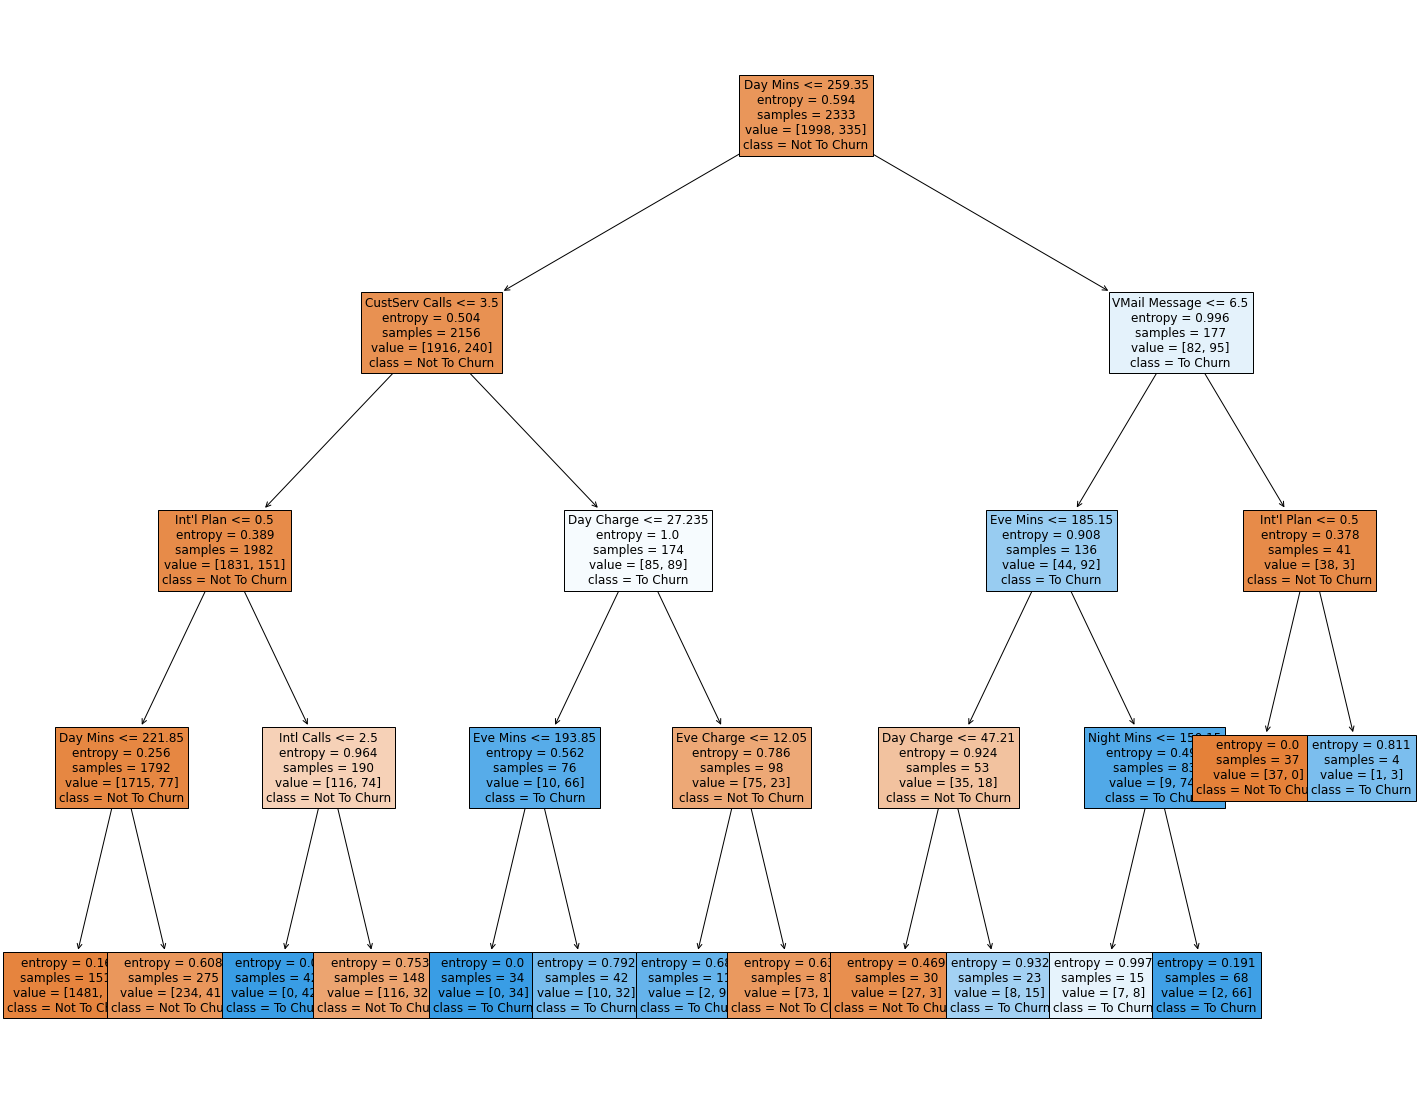

In [47]:
from sklearn import tree
from matplotlib import pyplot as plt

feature_names = training.columns
print(feature_names)

fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(
    clf,
    feature_names=feature_names,
    class_names={0:"Not To Churn", 1: "To Churn"},
    filled=True,
    fontsize=12
)